In [343]:
import numpy as np
import pandas as pd
import xgboost as xgb
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [332]:
df = pd.read_csv('../udataset/wealth_data.csv') # Using meat production as example

unemployment_data_df = pd.read_csv('../udataset/unemployment_by_state.csv')

health_data_df = pd.read_csv('../udataset/health_data.csv')

commodity_data_df = pd.read_csv('../udataset/all_commodities.csv')

meat_df = pd.read_csv('../udataset/meat/production.csv')
meat_df = meat_df[meat_df['DateTime'].str.contains(r'-12')]
meat_df = meat_df.rename(columns={'DateTime': 'year'})
meat_df['year'] = meat_df['year'].str.slice(0, 4)
meat_df['year'] = meat_df['year'].astype(int)



unemployment_data_df = unemployment_data_df.rename(columns={'State': 'state'})

#unemployment_data_df.drop(columns=['YearMonth'], inplace=True)
unemployment_data_df = unemployment_data_df[unemployment_data_df['YearMonth'].str.contains(r'-12')]
unemployment_data_df = unemployment_data_df.rename(columns={'YearMonth': 'year'})
unemployment_data_df['year'] = unemployment_data_df['year'].str.slice(0, 4)
unemployment_data_df['year'] = unemployment_data_df['year'].astype(int)

#health_data_df.drop(columns=['year'], inplace=True)
health_data_df['state'] = health_data_df['state'].str.lower()

commodity_data_df.drop(columns=['date'], inplace=True)
# commodity_data_df['year'] = pd.to_datetime(commodity_data_df['date']).dt.year
# commodity_data_df.drop(columns = ['date'], inplace=True)

# df = df.merge(unemployment_data_df, on=['year', 'state'], how='left')
# df = df.merge(health_data_df, on=['year', 'state'], how='left')
df = df.merge(meat_df, on = ['year'], how='left')

print(df.info())

# TODO - Charles u sure we don't need time series data?
# df = df.merge(commodity_data_df, on='year', how='left')


#df = df.drop(columns=['below_poverty_line_percent'])
df = df.drop(columns=['Unnamed: 0'])
df = df[df['year'] > 2010]
print(df.shape[1])
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

df = df.drop(columns = ['median_household_income', 'mean cash public assistance income (dollars)'])

# def format(df):
#     for col in df.columns:
#         df[f'tmp_{col}'] = df[col].shift(1)

#     return df
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    676 non-null    int64  
 1   state                                         676 non-null    object 
 2   year                                          676 non-null    int64  
 3   below_poverty_line_percent                    676 non-null    float64
 4   median_household_income                       676 non-null    float64
 5   mean cash public assistance income (dollars)  676 non-null    float64
 6   Beef                                          676 non-null    float64
 7   Veal                                          676 non-null    float64
 8   Pork                                          676 non-null    float64
 9   Lamb and Mutton                               676 non-null    flo

,state,year,below_poverty_line_percent,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Red Meat,Poultry
1,alabama,2011,17.6,2.096400e+09,10500000.0,2.052600e+09,11800000.0,2.857500e+09,41400000.0,511400000.0,4.171300e+09,3.410300e+09
2,alabama,2012,18.1,1.992300e+09,9600000.0,1.940500e+09,11900000.0,2.853700e+09,36300000.0,515300000.0,3.954300e+09,3.405300e+09
3,alabama,2013,18.6,2.019100e+09,9700000.0,2.053900e+09,12300000.0,3.093300e+09,40100000.0,479300000.0,4.095000e+09,3.612700e+09
4,alabama,2014,18.9,1.973400e+09,7500000.0,2.103100e+09,12600000.0,3.348500e+09,44300000.0,480800000.0,4.096600e+09,3.873600e+09
5,alabama,2015,18.8,2.020500e+09,7700000.0,2.194500e+09,12300000.0,3.334500e+09,44200000.0,470700000.0,4.235000e+09,3.849400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
671,wyoming,2018,11.1,2.091400e+09,6300000.0,2.221100e+09,11900000.0,3.228700e+09,36800000.0,497400000.0,4.330700e+09,3.762900e+09
672,wyoming,2019,11.0,2.239200e+09,6400000.0,2.432800e+09,11000000.0,3.647300e+09,41800000.0,469200000.0,4.689400e+09,4.158300e+09
673,wyoming,2020,10.8,2.291800e+09,5500000.0,2.499300e+09,10700000.0,3.720200e+09,42500000.0,458100000.0,4.807300e+09,4.220800e+09
674,wyoming,2021,10.7,2.326800e+09,5100000.0,2.393800e+09,10500000.0,3.700100e+09,44700000.0,453300000.0,4.736200e+09,4.198100e+09


In [333]:
health_data_df

,state,year,obesity_adult_rate,overweight_adult_rate,adults_no_leisure-time_physical_activity
0,alaska,2011,0.346154,0.98,0.177378
1,alaska,2012,0.264423,1.00,0.087404
2,alaska,2013,0.394231,0.86,0.185090
3,alaska,2014,0.456731,0.60,0.105398
4,alaska,2015,0.461538,0.83,0.177378
...,...,...,...,...,...
643,oregon,2018,0.466346,0.51,0.107969
644,oregon,2019,0.423077,0.58,0.226221
645,oregon,2020,0.379808,0.71,0.087404
646,oregon,2021,0.490385,0.56,0.123393


In [334]:
train_df = df[df['year'] < 2021]
test_df = df[df['year'] >= 2021]

train_data = train_df.to_numpy()
train_labels = train_data[:, 2]
test_data = test_df.to_numpy()
test_labels = test_data[:, 2]

train_df = train_df.drop(columns = ['below_poverty_line_percent'])
test_df = test_df.drop(columns = ['below_poverty_line_percent'])
train_df = train_df.drop(columns=['year'])
test_df = test_df.drop(columns=['year'])

train_data = train_df.to_numpy()
test_data = test_df.to_numpy()
train_data[:, 0]
train_data.shape
train_labels.shape

(520,)

In [335]:
le = LabelEncoder()
le.fit(train_data[:, 0])
train_data[:, 0] = le.transform(train_data[:, 0])
train_data.shape

(520, 10)

In [336]:
# define model evaluation method
# evaluate model
# scores = cross_val_score(model, train_data, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
model.fit(train_data, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [337]:
test_data[:, 0] = le.transform(test_data[:, 0])
test_data.shape

(104, 10)

In [338]:
#scores = absolute(scores)
#print(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
preds = model.predict(test_data)

In [339]:
preds

array([16.02359  , 16.478113 , 10.322077 , 10.1623335, 14.138607 ,
       14.897432 , 16.13221  , 16.575851 , 12.690953 , 13.300233 ,
        9.858011 , 10.085362 ,  9.762084 ,  9.616054 , 11.364336 ,
       11.35007  , 15.41688  , 15.622983 , 13.36977  , 13.7915   ,
       14.34062  , 14.694039 ,  9.31286  ,  9.219703 , 11.960669 ,
       12.629886 , 11.974027 , 12.131207 , 12.871712 , 13.053467 ,
       11.111572 , 11.35293  , 11.401495 , 11.757939 , 16.591597 ,
       16.911642 , 18.52287  , 18.578419 , 11.115273 , 11.598134 ,
        8.977172 ,  9.041928 ,  9.8023   , 10.1279   , 13.707201 ,
       14.160488 ,  9.321163 ,  9.288968 , 19.547709 , 20.042183 ,
       13.028941 , 13.409514 , 12.8237705, 12.976903 , 10.390802 ,
       10.767436 , 12.919694 , 13.162259 ,  7.4097233,  7.423008 ,
        9.727894 ,  9.786519 , 18.65346  , 19.030828 , 13.995602 ,
       14.009174 , 14.423378 , 14.597873 , 10.855007 , 10.279365 ,
       14.005012 , 13.938292 , 15.628136 , 15.563131 , 12.8629

In [340]:
df

,state,year,below_poverty_line_percent,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Red Meat,Poultry
1,alabama,2011,17.6,2.096400e+09,10500000.0,2.052600e+09,11800000.0,2.857500e+09,41400000.0,511400000.0,4.171300e+09,3.410300e+09
2,alabama,2012,18.1,1.992300e+09,9600000.0,1.940500e+09,11900000.0,2.853700e+09,36300000.0,515300000.0,3.954300e+09,3.405300e+09
3,alabama,2013,18.6,2.019100e+09,9700000.0,2.053900e+09,12300000.0,3.093300e+09,40100000.0,479300000.0,4.095000e+09,3.612700e+09
4,alabama,2014,18.9,1.973400e+09,7500000.0,2.103100e+09,12600000.0,3.348500e+09,44300000.0,480800000.0,4.096600e+09,3.873600e+09
5,alabama,2015,18.8,2.020500e+09,7700000.0,2.194500e+09,12300000.0,3.334500e+09,44200000.0,470700000.0,4.235000e+09,3.849400e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
671,wyoming,2018,11.1,2.091400e+09,6300000.0,2.221100e+09,11900000.0,3.228700e+09,36800000.0,497400000.0,4.330700e+09,3.762900e+09
672,wyoming,2019,11.0,2.239200e+09,6400000.0,2.432800e+09,11000000.0,3.647300e+09,41800000.0,469200000.0,4.689400e+09,4.158300e+09
673,wyoming,2020,10.8,2.291800e+09,5500000.0,2.499300e+09,10700000.0,3.720200e+09,42500000.0,458100000.0,4.807300e+09,4.220800e+09
674,wyoming,2021,10.7,2.326800e+09,5100000.0,2.393800e+09,10500000.0,3.700100e+09,44700000.0,453300000.0,4.736200e+09,4.198100e+09


In [341]:
(absolute(test_labels - preds)).mean()


0.49156132477980385

104


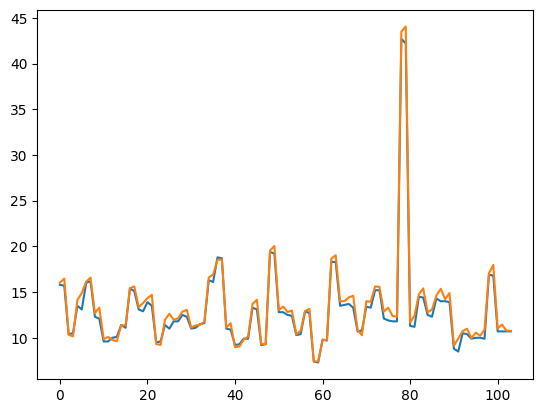

In [344]:
print(len(preds))
x = np.array(range(len(preds)))
y1 = test_labels
y2 = preds
plt.plot(x, y1)
plt.plot(x, y2)